## Understand Data

In [1]:
import os, os.path
from glob import glob
import numpy as np

import scipy.misc

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [2]:
#DATA_DIR = 'data/train'
DATA_DIR = '../../Train'

In [3]:
image_paths = glob(os.path.join(DATA_DIR, 'CameraRGB', '*.png'))
label_paths = glob(os.path.join(DATA_DIR, 'CameraSeg', '*.png'))

In [4]:
print("Total training images: ",len(image_paths))
print("Total training lables: ",len(label_paths))

Total training images:  1000
Total training lables:  1000


Train image shape:  (600, 800, 3)
Label image shape:  (600, 800, 3)


c:\users\ndalia\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


Text(0.5,1,'Label')

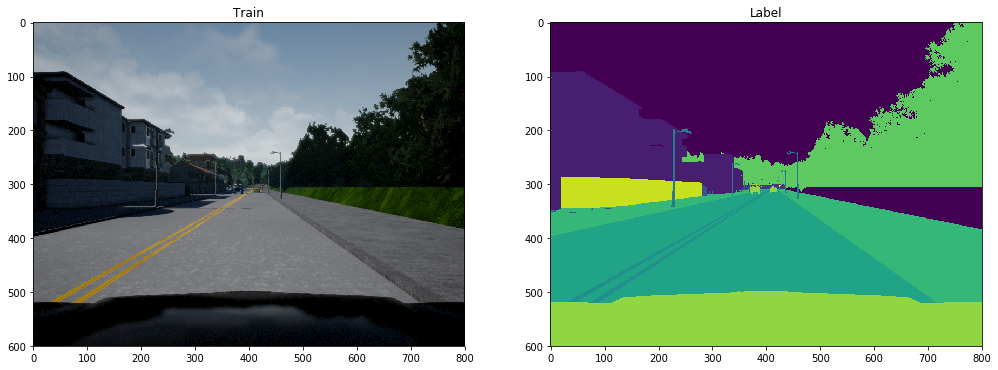

In [21]:
img_path = image_paths[0]
label_path = label_paths[0]
# read normalized image
train_img = mpimg.imread(img_path)
# read not normalized image
label_img = scipy.misc.imread(label_path)

print("Train image shape: ", train_img.shape)
print("Label image shape: ", label_img.shape)

fig = plt.figure(figsize=(17,15))
plt.subplot(121)
plt.imshow(train_img)
plt.title('Train')
plt.subplot(122)
plt.imshow(label_img[:,:,0]) # Only channel 0- [RED] has classification info
plt.title('Label')

In [22]:
np.amax(train_img), np.amax(label_img)

(0.84313726, 12)

## Where to CROP

Train image shape:  (600, 800, 3)
Label image shape:  (600, 800, 3)


c:\users\ndalia\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


Text(0.5,1,'Label')

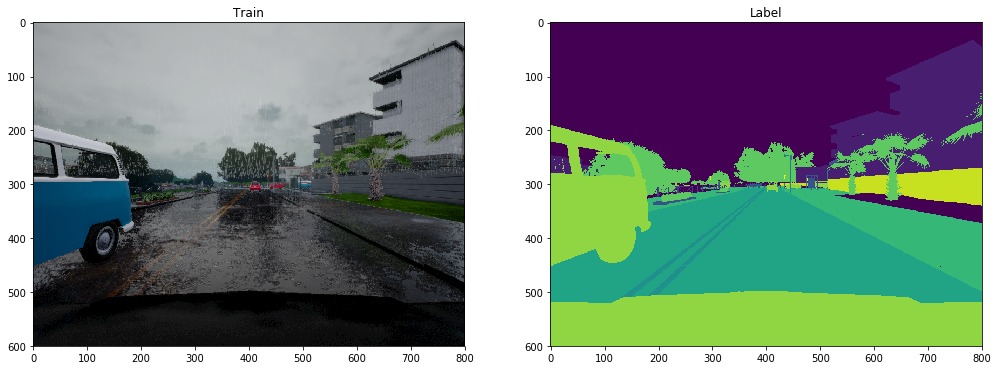

In [23]:
# interesting ones to check
img_path = '../../Train/CameraRGB/272.png'
label_path = '../../Train/CameraSeg/272.png'
train_img = mpimg.imread(img_path)
label_img = scipy.misc.imread(label_path)

print("Train image shape: ", train_img.shape)
print("Label image shape: ", label_img.shape)

fig = plt.figure(figsize=(17,15))
plt.subplot(121)
plt.imshow(train_img)
plt.title('Train')
plt.subplot(122)
plt.imshow(label_img[:,:,0]) # Only channel 0- [RED] has classification info
plt.title('Label')

In [50]:
# make sure it is pure hood  - do not want to include ROAD - 7
(label_img[522:,:,0]==7).nonzero()

(array([], dtype=int32), array([], dtype=int32))

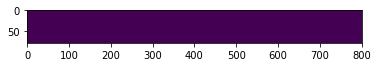

In [51]:
plt.imshow(label_img[522:,:,0])

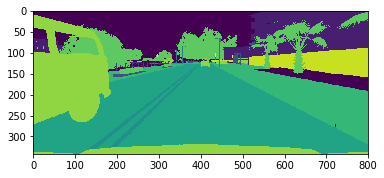

In [52]:
# cut off the sky and the car hood
plt.imshow(label_img[180:522,:,0])

In [53]:
label_img[180:522,:,0].shape

(342, 800)

### In order to feed the image and train the VGG16 network, input has to be dividable by 32 (2^5).

In [59]:
# need to work on 342
342/32.,342%32, 800/32., 800%32

(10.6875, 22, 25.0, 0)

In [61]:
352/32.

11.0

In [63]:
# the final cropping
label_img[170:522,:,0].shape

(352, 800)

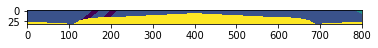

In [78]:
# following part the hood should not labled as a CAR.
plt.imshow(label_img[320:,:,0])

## FINAL Data preprocess

In [111]:
# Vehicles - class 10
CAR_COLOR = np.array([10, 0, 0])
# Roads - class 7
ROAD_COLOR = np.array([7, 0, 0])
# RoadLines - class 6
ROADLINE_COLOR = np.array([6, 0, 0])

def data_preprocess(img_path, label_path):
    train_img = mpimg.imread(img_path)
    label_img = scipy.misc.imread(label_path)
    train_img = train_img[170:522,:,:]
    label_img = label_img[170:522,:,:]
    
    # label processing
    gt1 = np.all((label_img == ROAD_COLOR) | (label_img == ROADLINE_COLOR), axis=2)
    gt2 = np.append(np.all(label_img[:320,:,:] == CAR_COLOR, axis=2), \
                    np.all(label_img[320:,:,:] == np.array([222, 0, 0]), axis=2),axis=0)
    gt3 = gt1 == gt2
    gt1 = gt1.reshape(*gt1.shape,1)
    gt2 = gt2.reshape(*gt2.shape,1)
    gt3 = gt3.reshape(*gt3.shape,1)
    gt_label = np.concatenate((gt2, gt1, gt3), axis=2)
    
    return train_img, gt_label.astype('uint8')    

In [112]:
img_path = '../../Train/CameraRGB/272.png'
label_path = '../../Train/CameraSeg/272.png'
train_img, label = data_preprocess(img_path, label_path)

c:\users\ndalia\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # Remove the CWD from sys.path while we load stuff.


In [113]:
train_img.shape, label.shape

((352, 800, 3), (352, 800, 3))

In [120]:
label[:,:,0].shape

(352, 800)

## Remember to add up the cropped part

In [107]:
cropped_part_sky = (np.zeros(shape=(170,800))==1).astype('uint8')
cropped_part_hood = (np.zeros(shape=(78,800))==1).astype('uint8')

In [121]:
np.append(cropped_part_sky,label[:,:,0],axis=0)

(522, 800)

In [126]:
final_result = np.append(np.append(cropped_part_sky,label[:,:,0],axis=0),cropped_part_hood,axis=0)
final_result.shape

(600, 800)

## Some visualization

### Roadlines are road

In [129]:
img_path = image_paths[0]
label_path = label_paths[0]
# read normalized image
train_img = mpimg.imread(img_path)
# read not normalized image
label_img = scipy.misc.imread(label_path)

c:\users\ndalia\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


In [130]:
# Roads - class 7
road_color = np.array([7, 0, 0])
# RoadLines - class 6
roadline_color = np.array([6, 0, 0])

c:\users\ndalia\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  after removing the cwd from sys.path.
c:\users\ndalia\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  """


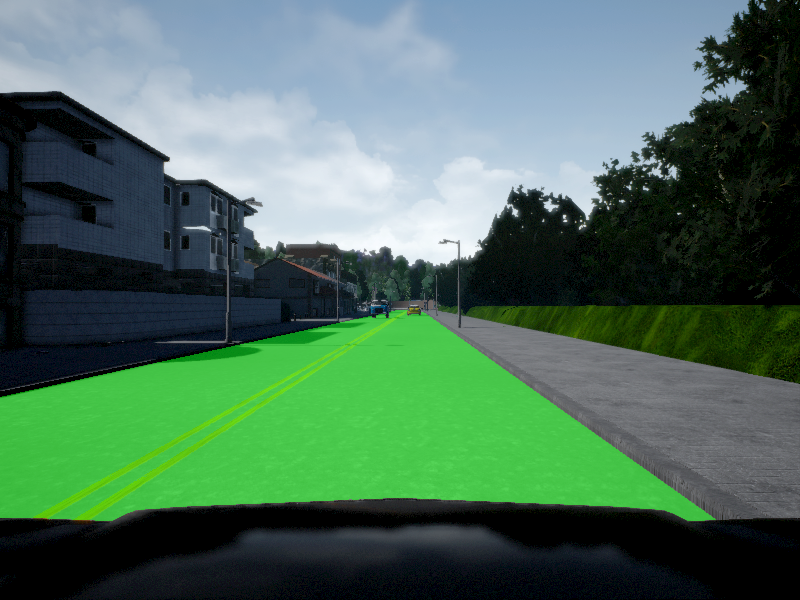

In [131]:
# Add roadlines into Road
seg_road = np.all((label_img==road_color)|(label_img==roadline_color),axis=2).reshape(600,800,1)
mask1 = np.dot(seg_road, np.array([[0,255,0,127]]))
mask1 = scipy.misc.toimage(mask1,mode="RGBA")
street_im = scipy.misc.toimage(train_img)
street_im.paste(mask1, box=None, mask=mask1)
street_im


In [3]:
a= np.zeros((10,10,3), dtype=np.uint8)

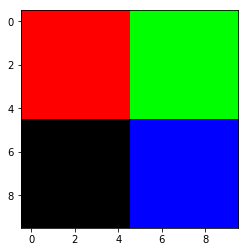

In [2]:
a= np.zeros((10,10,3), dtype=np.uint8)
a[0:5,0:5] =  [255,0,0]
a[0:5,5: ] =  [0,255,0]
a[5: ,5: ] =  [0,0,255]
a[5: ,0:5] =  [0,0,0]
plt.imshow(a)

In [102]:
# pick up a class, red
class1_color = np.array([255, 0, 0])
# Convert image pixels, true if pixel value is equal to class1_color False otherwise.
gt = np.all(a == class1_color, axis=2)
# change the shape 2D to 3D - one channel
gt = gt.reshape(*gt.shape,1)
# concatenate to generate 2 channels, yes/no
gt_img = np.concatenate((gt, np.invert(gt)), axis=2)
a.shape,gt_img.shape

((10, 10, 3), (10, 10, 2))

In [108]:
# pick up a class, red
class1_color = np.array([255, 0, 0])
# pick up a class, blue
class2_color = np.array([0, 0, 255])
# pick up a class, green
class3_color = np.array([0, 255, 0])
# Convert image pixels, true if pixel value is equal to class1_color False otherwise.
gt1 = np.all(a == class1_color, axis=2)
gt2 = np.all(a == class2_color, axis=2)
gt3 = np.all(a == class3_color, axis=2)
gt1 = gt1.reshape(*gt1.shape,1)
gt2 = gt2.reshape(*gt2.shape,1)
gt3 = gt3.reshape(*gt3.shape,1)
gt_label = np.concatenate((gt1, gt2, gt3), axis=2)
a.shape,gt_label.shape

((10, 10, 3), (10, 10, 3))

In [4]:
a[0:5,0:5] = [1,0,0]
a[0:5,5: ] = [2,0,0]
a[5: ,5: ] = [3,0,0]
a[5: ,0:5] = [0,0,0]

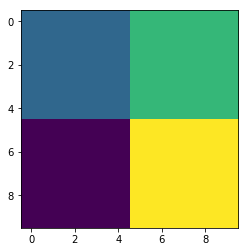

In [5]:
plt.imshow(a[:,:,0])

In [6]:
road_color = np.array([1, 0, 0])
car_color = np.array([2, 0, 0])

In [7]:
# Convert image pixels, true if pixel value is equal to class1_color False otherwise.
gt1 = np.all(a == road_color, axis=2)
gt2 = np.all(a == car_color, axis=2)
gt3 = np.all((a != road_color) & (a != car_color), axis=2)
gt1 = gt1.reshape(*gt1.shape,1)
gt2 = gt2.reshape(*gt2.shape,1)
gt3 = gt3.reshape(*gt3.shape,1)
gt_label = np.concatenate((gt1, gt2, gt3), axis=2)
a.shape,gt_label.shape

((10, 10, 3), (10, 10, 3))

In [24]:
num_classes = 3 # car,road,other
# 4D 
tensor_4d_imgs   = np.array([a,a])
tensor_4d_labels = np.array([gt_label,gt_label])
# 4D to 2D
tensor_2d_imgs   = tensor_4d_imgs.reshape(-1,num_classes)
tensor_2d_labels = tensor_4d_labels.reshape(-1,num_classes)
tensor_2d_imgs.shape, tensor_2d_labels.shape

((200, 3), (200, 3))